## Wine Quality Prediction Using Linear Regression

This project applies Linear Regression to predict the quality of red wine based on various physicochemical properties, such as acidity, alcohol content, and pH levels. The dataset undergoes preprocessing, including handling missing values, feature selection, and data normalization.

The model’s performance is evaluated using Mean Squared Error (MSE) and R² score. Additionally, a histogram is used to analyze the distribution of prediction errors, providing insights into how well the model generalizes to unseen data. The final model helps in understanding the key factors influencing wine quality, aiding in better decision-making within the wine industry.
 

##  Import Libraries and Load Data

* **pandas**: Used for data manipulation and analysis, offering powerful data structures like DataFrames to handle and process structured data efficiently.
* **numpy**: Provides support for numerical operations on large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
* **matplotlib.pyplot**: Used for creating static, interactive, and animated visualizations in Python, enabling plotting of various graphs such as line charts, scatter plots, and histograms.
* **seaborn**: A data visualization library built on matplotlib, providing a high-level interface to create statistical graphics such as heatmaps, pair plots, and box plots.
* **sklearn.model_selection**:
    * **train_test_split**: Splits the dataset into training and testing sets, ensuring an appropriate balance for model training and validation.
* **sklearn.preprocessing**:
  * **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, ensuring all features contribute equally to the model.
  * **OneHotEncoder**: Converts categorical variables into a binary matrix (dummy variables), enabling models to interpret non-numerical features.
* **sklearn.linear_model**:
  * **LinearRegression**: Builds a linear model by fitting a straight line to the data, predicting the target variable based on input features.
  * **Ridge**: A variation of linear regression that introduces L2 regularization, which reduces model complexity by penalizing large coefficients.
  * **Lasso**: Applies L1 regularization to linear regression, effectively performing feature selection by shrinking less important feature coefficients to zero.
* **sklearn.metrics**:
  * **mean_squared_error (MSE)**: Measures the average squared difference between actual and predicted values, penalizing large errors.
  * **mean_absolute_error (MAE)**: Computes the average absolute difference between actual and predicted values, giving equal weight to all errors.
  * **r2_score (R²)**: Indicates how well the model fits the data, representing the proportion of variance explained by the model.


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression  
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge , Lasso

In [4]:
df = pd.read_csv(r'C:\Users\Satheesh\Desktop\winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##  Data Preprocessing

In [6]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [15]:
df.shape

(1599, 12)

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Exploratory Data Analysis

<Axes: >

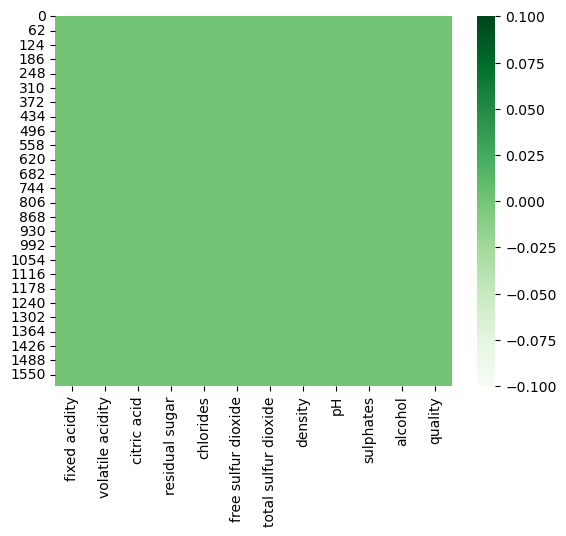

In [19]:
sns.heatmap(df.isnull() , cmap ="Greens")

In [20]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
x = df.drop(columns=['quality'])  
y = df['quality'] 

##### Model Training:

* A Linear Regression model is trained using the processed feature set (X_train) and target variable (y_train).

##### Prediction:

* The trained model is used to predict wine quality on the test dataset (X_test).

##### Evaluation Metrics:

* Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values.

* R² Score: Represents how well the independent variables explain the variance in wine quality.

* Histogram of Prediction Errors: Visualizes the distribution of errors to analyze model performance.

#### Split into training and testing sets

train_test_split() splits data into training (80%) and testing (20%) subsets.
random_state=42 ensures reproducibility by generating the same split each time.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=42)

### Training the model

In [54]:
LR = LinearRegression()
LR

LinearRegression()

In [48]:
LR.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [29]:
y_pred= LR.predict(x_test)
y_pred

array([5.34666441, 5.05631345, 5.66446972, 5.46451484, 5.72518476,
       5.27928659, 5.03421667, 5.12623347, 5.74534288, 5.68665032,
       6.13959677, 5.23386892, 5.54991474, 5.25825299, 5.44810502,
       6.46828999, 5.15018088, 5.59105157, 6.5560658 , 5.32255751,
       5.3918385 , 5.19610791, 5.94475739, 6.36197631, 5.35484893,
       5.41907575, 6.36483321, 5.35121573, 5.172392  , 6.16987311,
       5.25263058, 5.50657406, 5.75422105, 5.39101712, 5.45331031,
       5.02757499, 6.16173243, 5.68661555, 5.6486077 , 6.165471  ,
       5.52872593, 5.24414488, 6.17724727, 5.16500868, 5.87598332,
       5.81317121, 6.41982782, 5.6059474 , 5.15232137, 5.55634632,
       5.16044852, 5.10449459, 5.58371721, 6.33425313, 4.95134985,
       4.98364804, 6.01041999, 5.40809804, 5.83802638, 5.2486897 ,
       5.60717482, 5.96630957, 5.27619063, 5.30380113, 6.4949309 ,
       5.42033967, 6.34273471, 5.24618531, 6.41317317, 5.31237924,
       6.41746963, 4.74315748, 5.79362039, 5.8283184 , 6.17598

In [30]:
mse= mean_squared_error(y_test,y_pred)
mse

0.39002514396431676

In [31]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.5035304415524664

In [32]:
r2square = r2_score(y_test,y_pred)
r2square

0.4031803412790682

In [33]:
rsme = np.sqrt(mse)
rsme

0.6245199307983027

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge , Lasso

In [35]:
lr_model= LinearRegression()
lr_score = cross_val_score(lr_model,x_train,y_train,cv=5)

In [36]:
ridge_model= Ridge(alpha=1.0)
ridge_score = cross_val_score(ridge_model,x_train,y_train,cv=5)

In [37]:
lasso_model= Lasso(alpha=1.0)
lasso_score = cross_val_score(lr_model,x_train,y_train,cv=5)

In [38]:
lr_model.fit(x_train,y_train)
lr_predictions = lr_model.predict(x_test)
lr_mse = mean_squared_error(y_test,lr_predictions)
lr_mse
lr_r2 = r2_score(y_test,lr_predictions)
lr_r2

0.4031803412790682

In [39]:
ridge_model.fit(x_train,y_train)
ridge_predictions = ridge_model.predict(x_test)
ridge_r2 = r2_score(y_test,ridge_predictions)
ridge_r2

0.3987064350767683

In [40]:
lasso_model.fit(x_train,y_train)
lasso_predictions = lasso_model.predict(x_test)
lasso_r2 = r2_score(y_test,ridge_predictions)
lasso_r2

0.3987064350767683

###  Visualizations

We include the following visualizations to better understand model behavior:

1. **Feature Distributions**
 Histograms of each numerical feature in the dataset. This helps visualize the shape, spread, and skewness of each variable. It can reveal outliers,      unusual distributions, and whether data normalization or transformation might be helpful.

2. **Residuals Plot**  
   Plots residuals (actual - predicted) vs predicted values. Helps detect patterns like heteroscedasticity or non-linearity.

3. **Residual Distribution**  
   Histogram of residuals to verify if they are normally distributed — a key assumption in linear regression.


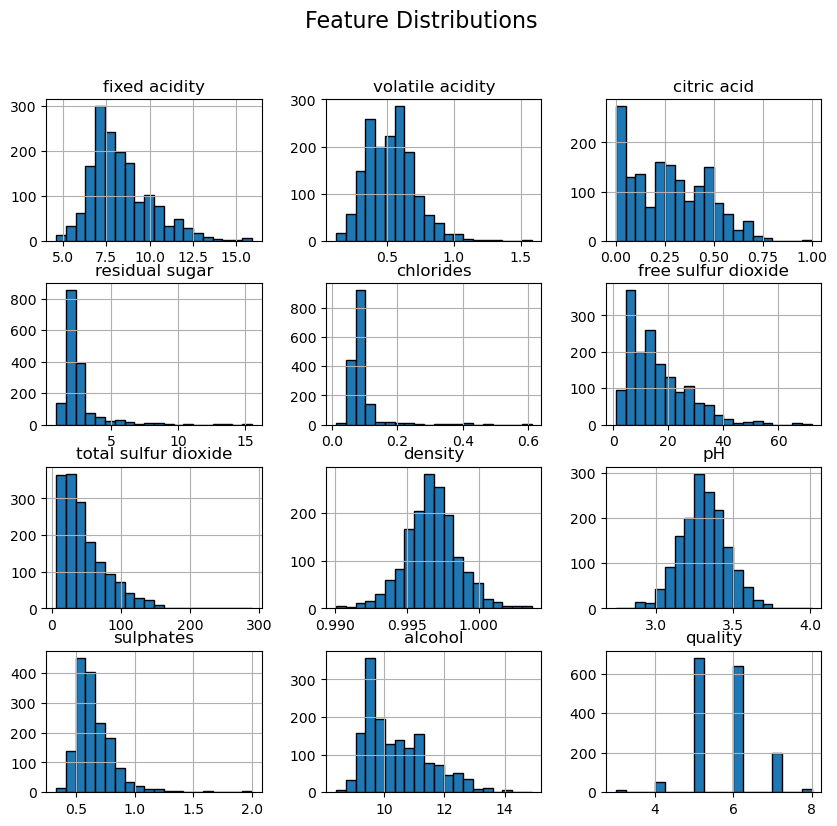

In [42]:
df.hist(figsize=(10, 9), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()


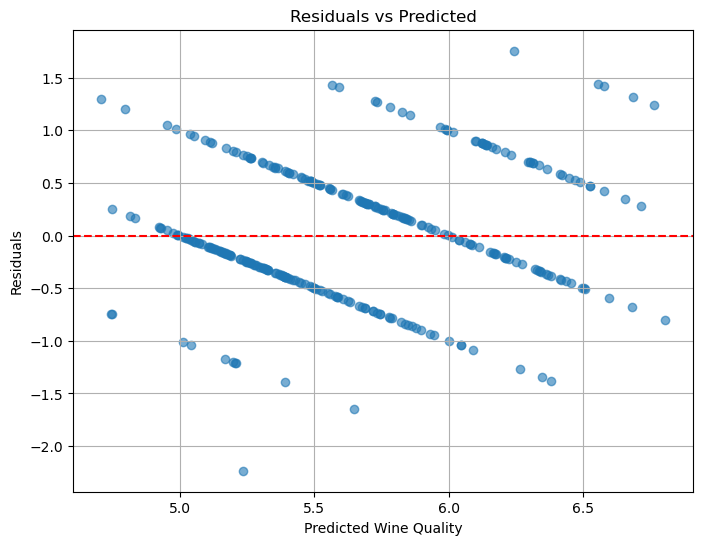

In [56]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Wine Quality")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()

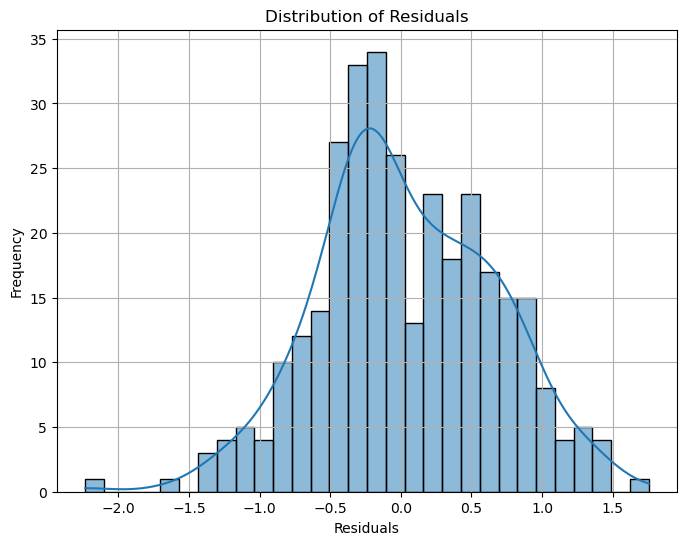

In [58]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()